In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
df = pd.read_csv("student_performance_large_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [3]:
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [6]:
# Drop non-numeric and irrelevant columns
df.drop(columns=['Student_ID'], inplace=True)

In [7]:
# Convert categorical variables to numerical using Label Encoding
categorical_cols = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
                    'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
# Select features and target variable
X = df.drop(columns=['Exam_Score (%)'])  # Predicting Exam Score
y = df['Exam_Score (%)']

In [9]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

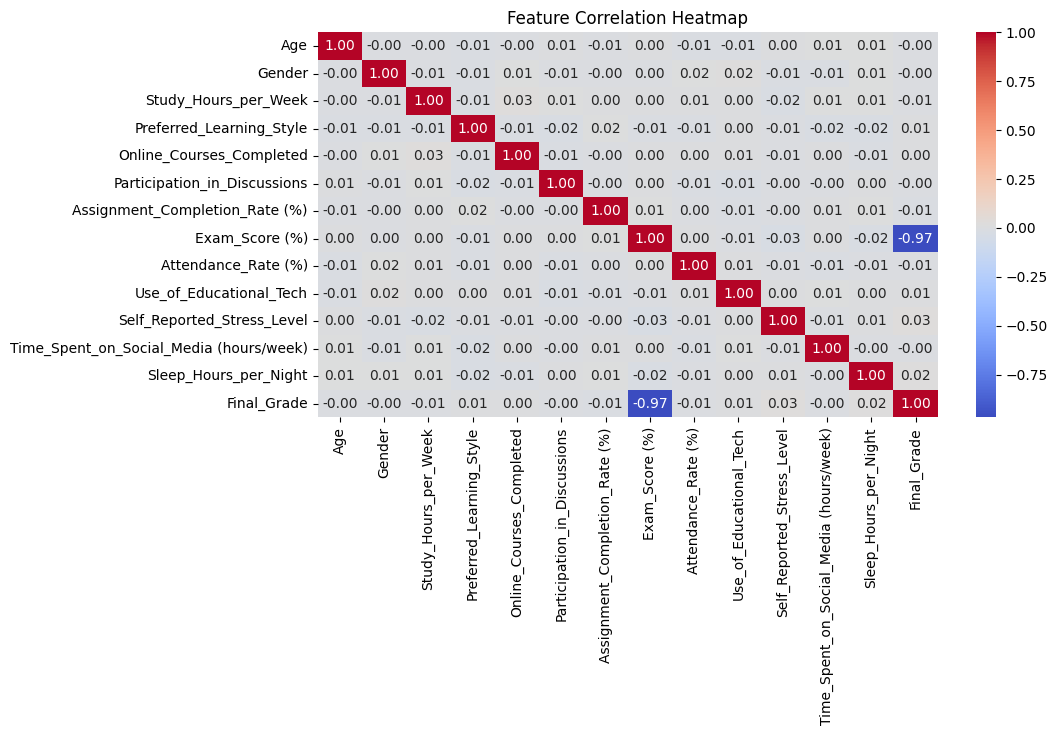

In [10]:
# --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

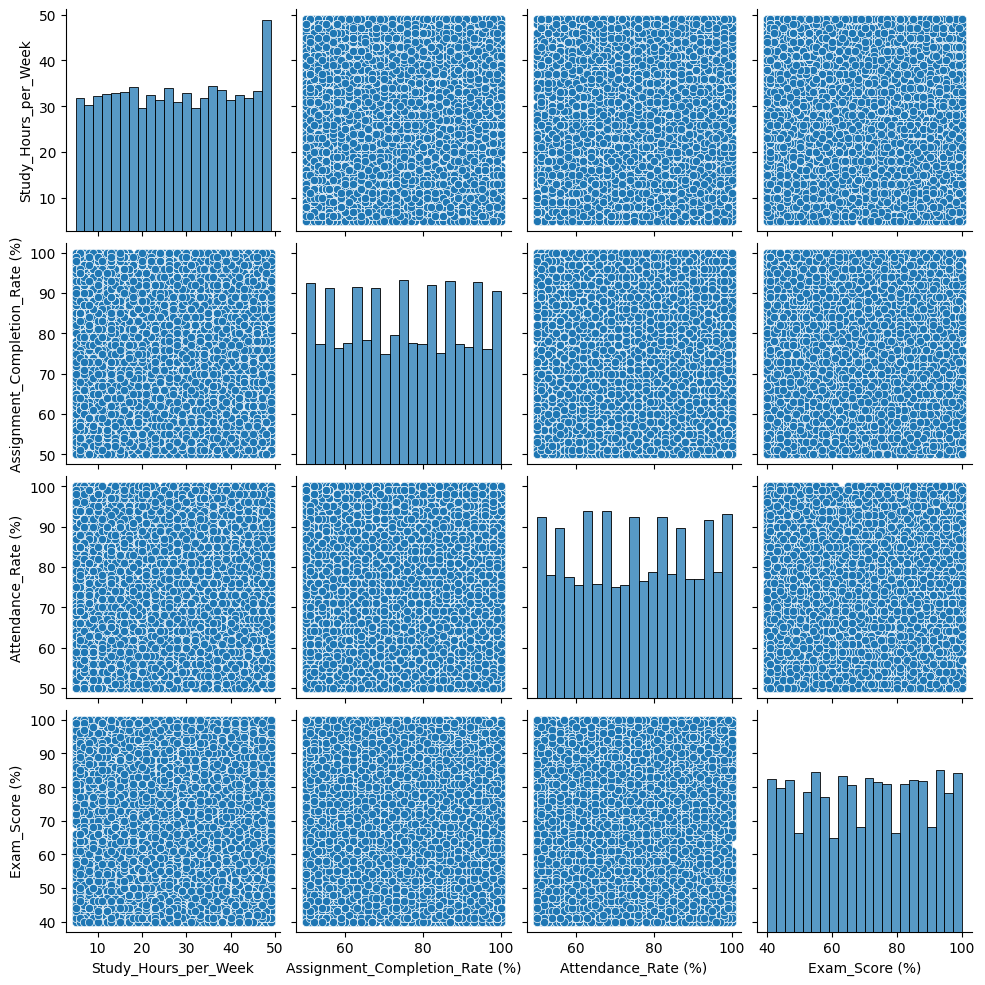

In [11]:
sns.pairplot(df[['Study_Hours_per_Week', 'Assignment_Completion_Rate (%)', 'Attendance_Rate (%)', 'Exam_Score (%)']])
plt.show()

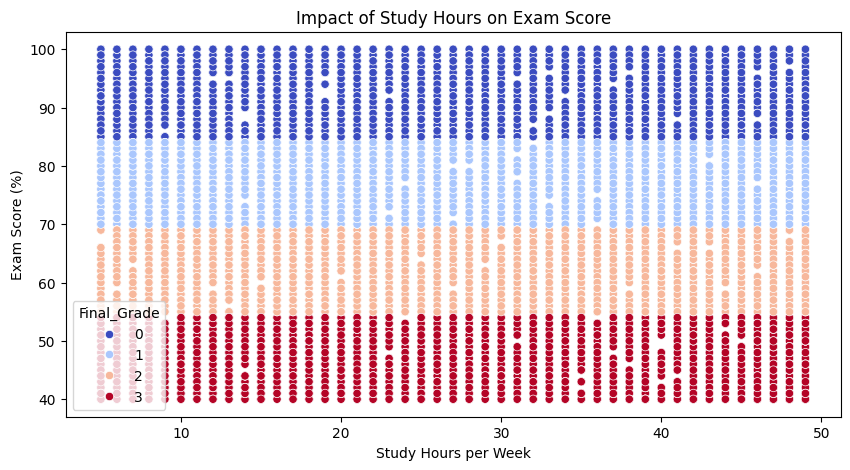

In [12]:
# --- Study Hours vs Exam Score ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Exam_Score (%)'], hue=df['Final_Grade'], palette='coolwarm')
plt.xlabel("Study Hours per Week")
plt.ylabel("Exam Score (%)")
plt.title("Impact of Study Hours on Exam Score")
plt.show()

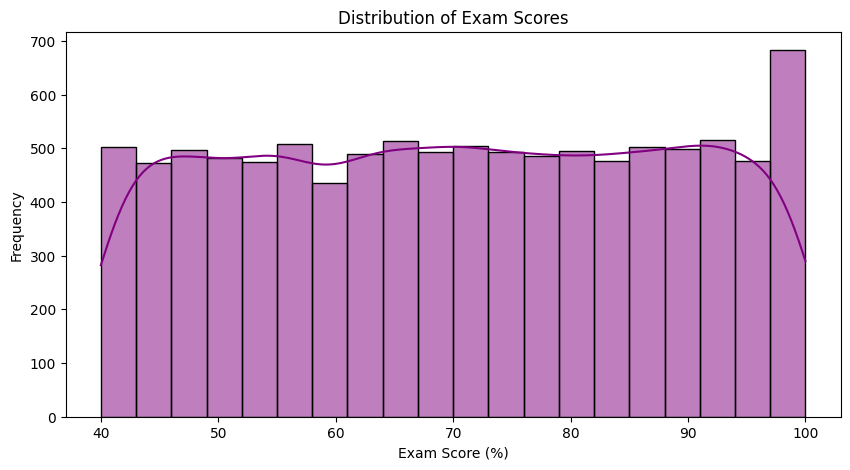

In [13]:
# --- Additional Plots ---
plt.figure(figsize=(10, 5))
sns.histplot(df['Exam_Score (%)'], bins=20, kde=True, color='purple')
plt.xlabel("Exam Score (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8812\3424385561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Self_Reported_Stress_Level'], y=df['Exam_Score (%)'], palette='coolwarm')


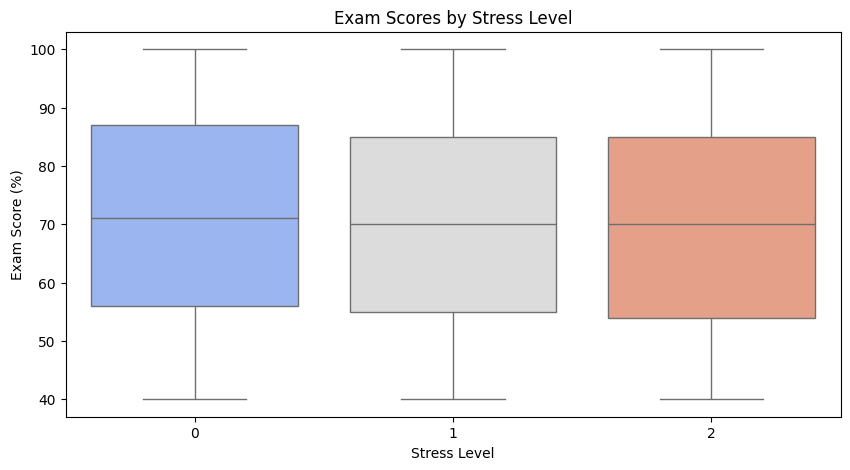

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Self_Reported_Stress_Level'], y=df['Exam_Score (%)'], palette='coolwarm')
plt.xlabel("Stress Level")
plt.ylabel("Exam Score (%)")
plt.title("Exam Scores by Stress Level")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8812\3776575637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Final_Grade'], palette='viridis')


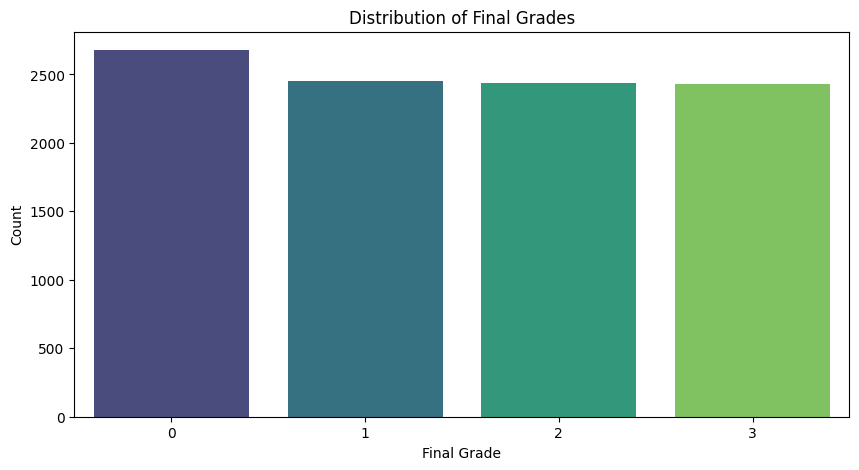

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Final_Grade'], palette='viridis')
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Distribution of Final Grades")
plt.show()

In [17]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# --- Simple Linear Regression ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred_lr = lr.predict(X_test_scaled)

In [20]:
# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}")

Linear Regression - R2: 0.9380, MSE: 19.3360, MAE: 3.7783


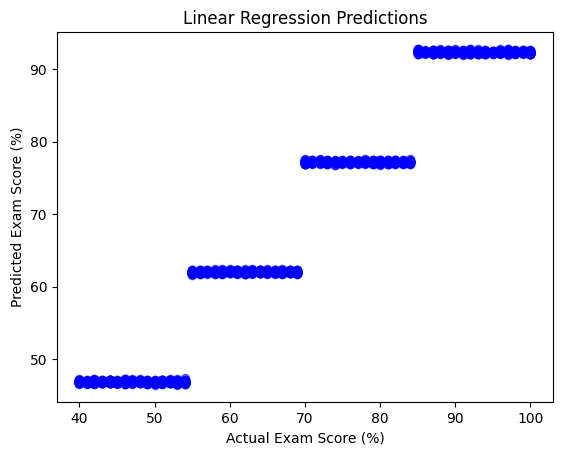

In [21]:
# Plot results
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel("Actual Exam Score (%)")
plt.ylabel("Predicted Exam Score (%)")
plt.title("Linear Regression Predictions")
plt.show()

In [22]:
# --- Polynomial Regression ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)


LinearRegression()

In [23]:
y_pred_poly = lr_poly.predict(X_test_poly)

In [24]:
# Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression - R2: {r2_poly:.4f}, MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}")

Polynomial Regression - R2: 0.9370, MSE: 19.6354, MAE: 3.8024


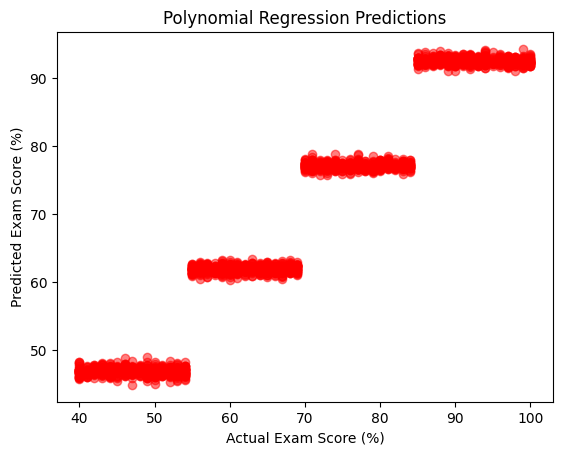

In [25]:
# Plot results
plt.scatter(y_test, y_pred_poly, color='red', alpha=0.5)
plt.xlabel("Actual Exam Score (%)")
plt.ylabel("Predicted Exam Score (%)")
plt.title("Polynomial Regression Predictions")
plt.show()